This notebook implements W-net for unsupervised classification on videos:

In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import numpy as np

import glob
import cv2

from skimage.io import imread

from util import get_unet
from util import plot_inputs

In [16]:
# read in one image
# Display result
img = cv2.imread('./data/frame9000.jpg')


In [17]:
# image dimensions
img.shape

(1080, 1920, 3)

In [18]:
# check if there are 3 channels:
len(img.shape)

3

In [19]:
# maybe convert 3 channels to greyscale ??

In [20]:
# print min and max values in the image for each channel
# RGB colors are defined on 0-255 scale (so will need to rescale)

# read
print(img[:, 0].min())
print(img[:, 0].max())

# green
print(img[:, 1].min())
print(img[:, 1].max())

# blue
print(img[:, 2].min())
print(img[:, 2].max())

46
204
58
206
50
207


In [21]:
# input images and preview
files_img = glob.glob('./data/*.jpg')

<IPython.core.display.Javascript object>


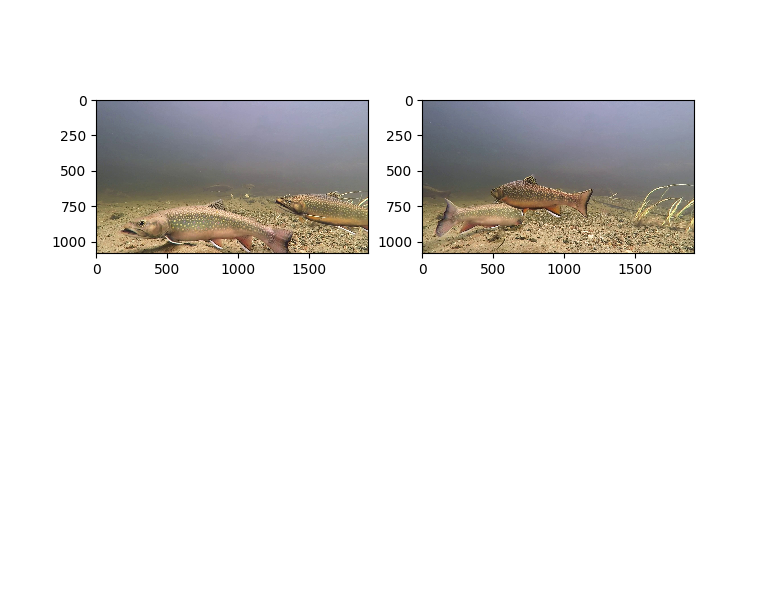

In [28]:
%matplotlib notebook
plot_inputs(files_img, 2)

In [29]:
# save all images as a numpy array
x = np.zeros( (len(files_img), img.shape[0], img.shape[1], img.shape[2]), dtype = np.float64)

In [1]:
# kernel keeps dying when running the cell below. I suspect images are too big. So, maybe read in half of them?

In [ ]:
%%time
for i, file_img in zip(range(len(files_img)), files_img):

    x[i, :] = imread(file_img)
    
nx, width, height, colors = x.shape

In [ ]:
# split data into training and validation sets

In [ ]:
# construct model
model = get_unet(height, width, colors)

# specify optimization procedure parameters
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['mae'])
model.summary()

In [4]:
# train W-net to do unsupervised classification

In [ ]:
# set parameters for training 
batch_size = 128
epochs=100
unique_name = petname.name()
model_filename = 'model_'+unique_name+'.h5'
history_filename = 'results_'+unique_name+'.npz'
earlystopper = EarlyStopping(patience=100, verbose=1)
checkpointer = ModelCheckpoint(model_filename, verbose=1, save_best_only=True)
tensorboard = TensorBoard(log_dir='tensorboard_logs/')
callbacks = [earlystopper, checkpointer]